In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from xgboost import XGBRegressor
import matplotlib.pyplot as plt
import seaborn as sns
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

Using TensorFlow backend.


In [2]:
df = pd.read_csv('../input/train.csv')
df1 = pd.read_csv('../input/test.csv')

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
float_col = []
for i in df:
    if df[i].dtype == 'int64':
        float_col.append(i)
    

In [5]:
float_col

['Id',
 'MSSubClass',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [6]:
df['LotFrontage'].fillna(0, inplace = True)
df['FireplaceQu'].fillna(df['FireplaceQu'].mode()[0], inplace = True)
df['GarageType'].fillna(df['GarageType'].mode()[0], inplace = True)
df['GarageYrBlt'].fillna(0, inplace = True)
df['GarageFinish'].fillna(df['GarageFinish'].mode()[0], inplace = True)
df['GarageQual'].fillna(df['GarageQual'].mode()[0], inplace = True)
df['GarageCond'].fillna(df['GarageCond'].mode()[0], inplace = True)
df['BsmtQual'].fillna(df['BsmtQual'].mode()[0], inplace = True)
df['BsmtCond'].fillna(df['BsmtCond'].mode()[0], inplace = True)
df['BsmtExposure'].fillna(df['BsmtExposure'].mode()[0], inplace = True)
df['BsmtFinType1'].fillna(df['BsmtFinType1'].mode()[0], inplace = True)
df['BsmtFinType2'].fillna(df['BsmtFinType2'].mode()[0], inplace = True)
df['Electrical'].fillna(df['Electrical'].mode()[0], inplace = True)
df['MasVnrType'].fillna(df['MasVnrType'].mode()[0], inplace = True)
df['MasVnrArea'].fillna(df['MasVnrArea'].mode()[0], inplace = True)

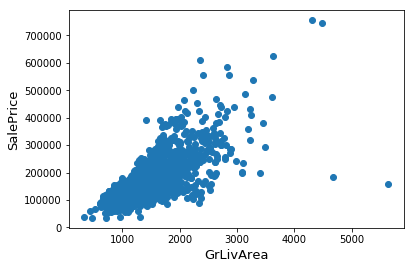

In [7]:
fig, ax = plt.subplots()
ax.scatter(x = df['GrLivArea'], y = df['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

In [8]:
df = df.drop(df[(df['GrLivArea']>4000) & (df['SalePrice']<300000)].index)

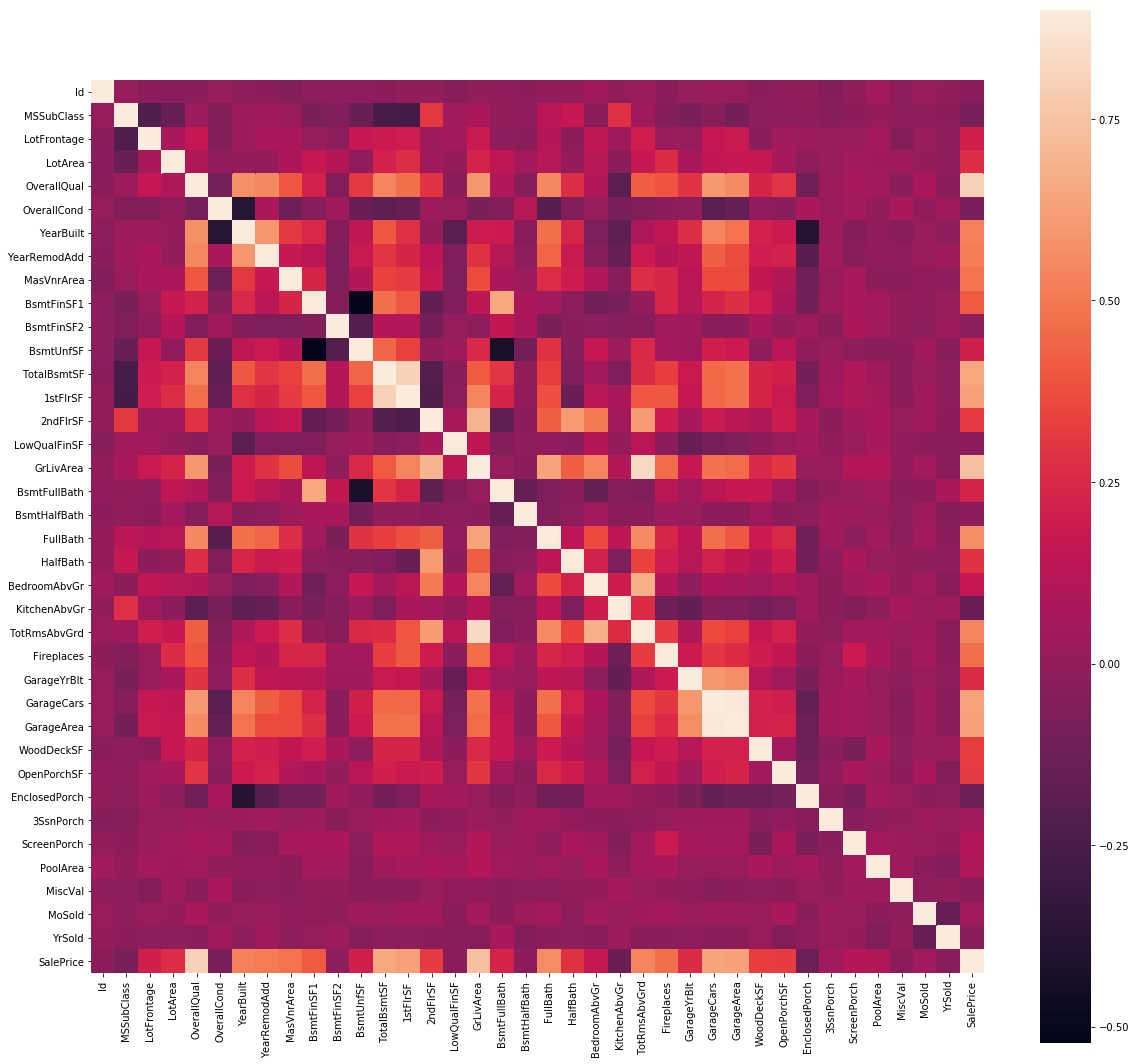

In [9]:
corrmat = df.corr()
plt.subplots(figsize=(20,19))
sns.heatmap(corrmat, vmax=0.9, square=True)

In [10]:
X = df.drop(columns = ['Id', 'Alley', 'PoolQC', 'Fence', 'MiscFeature', 'SalePrice'])
y = df['SalePrice']

In [11]:
X.isnull().sum().sum()

0

In [12]:
df1.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [13]:
df1['LotFrontage'].fillna(0, inplace = True)
df1['FireplaceQu'].fillna(df1['FireplaceQu'].mode()[0], inplace = True)
df1['GarageType'].fillna(df1['GarageType'].mode()[0], inplace = True)
df1['GarageYrBlt'].fillna(0, inplace = True)
df1['GarageFinish'].fillna(df1['GarageFinish'].mode()[0], inplace = True)
df1['GarageQual'].fillna(df1['GarageQual'].mode()[0], inplace = True)
df1['GarageCond'].fillna(df1['GarageCond'].mode()[0], inplace = True)
df1['BsmtQual'].fillna(df1['BsmtQual'].mode()[0], inplace = True)
df1['BsmtCond'].fillna(df1['BsmtCond'].mode()[0], inplace = True)
df1['BsmtExposure'].fillna(df1['BsmtExposure'].mode()[0], inplace = True)
df1['BsmtFinType1'].fillna(df1['BsmtFinType1'].mode()[0], inplace = True)
df1['BsmtFinType2'].fillna(df1['BsmtFinType2'].mode()[0], inplace = True)
df1['Electrical'].fillna(df1['Electrical'].mode()[0], inplace = True)
df1['MasVnrType'].fillna(df1['MasVnrType'].mode()[0], inplace = True)
df1['MasVnrArea'].fillna(df1['MasVnrArea'].mode()[0], inplace = True)
df1['MSZoning'].fillna(df1['MSZoning'].mode()[0], inplace = True)
df1['Utilities'].fillna(df1['Utilities'].mode()[0], inplace = True)
df1['Exterior1st'].fillna(df1['Exterior1st'].mode()[0], inplace = True)
df1['Exterior2nd'].fillna(df1['Exterior2nd'].mode()[0], inplace = True)
df1['BsmtFullBath'].fillna(0, inplace = True)
df1['BsmtHalfBath'].fillna(0, inplace = True)
df1['KitchenQual'].fillna(df1['KitchenQual'].mode()[0], inplace = True)
df1['Functional'].fillna(df1['Functional'].mode()[0], inplace = True)
df1['GarageCars'].fillna(0, inplace = True)
df1['GarageArea'].fillna(0, inplace = True)
df1['BsmtFinSF1'].fillna(0, inplace = True)
df1['BsmtFinSF2'].fillna(0, inplace = True)
df1['BsmtUnfSF'].fillna(0, inplace = True)
df1['TotalBsmtSF'].fillna(0, inplace = True)
df1['SaleType'].fillna(df1['SaleType'].mode()[0], inplace = True)

In [14]:
X_test = df1.drop(columns = ['Id', 'Alley', 'PoolQC', 'Fence', 'MiscFeature'])

In [15]:
X_test.isnull().sum().sum()

0

In [16]:
X.shape

(1458, 75)

In [17]:
X_test.shape

(1459, 75)

In [18]:
float_col = []
for i in X:
    if X[i].dtype == 'object':
        float_col.append(i)

In [19]:
for i in float_col:
    X[i] = pd.factorize(X[i])[0]

In [20]:
float_col_ = []
for i in X_test:
    if X_test[i].dtype == 'object':
        float_col_.append(i)

In [21]:
for i in float_col_:
    X_test[i] = pd.factorize(X_test[i])[0]

In [22]:
X_test.isnull().sum().sum()

0

In [23]:
X.shape

(1458, 75)

In [24]:
gbm = GradientBoostingRegressor()
gbm.fit(X, y)


GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [25]:
y_pred = gbm.predict(X_test)

In [26]:
submission = pd.DataFrame({'Id': df1['Id'], 'SalePrice': y_pred})

In [27]:
submission.head()

,Id,SalePrice
0,1461,131528.017709
1,1462,157035.734145
2,1463,172582.910609
3,1464,178680.268236
4,1465,193940.059717


In [28]:
filename = 'submission.csv'
submission.to_csv(filename, index = False)